# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel(r"merkur.xlsx")
df


,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

<h2> Solution: </h2>


First we remove the unnecessary name column 'WaterworksName' and visualize the percentage of missing data for each feature. We can observe that the percentage of missing data ranges from 5% all the way up to 64% in 'UniformityCoefficient'.
We remove the features with more than 30% of data missing as they might introduce bias if we try to impute such a high percentage.
A heatmap visualising missing values is shown as well and can be used to find correlation between the missing data points - we can pick up on certain patterns here, such as missing <i> MaxTypicalValue </i> values allign with missing <i> FilterExploitation </i> values. It seems all categorical values are intact and there are only numerical values missing.

TotalFilters                  0.00
MaxTypicalFlow               20.25
AverageFilterArea             5.06
AverageTypicalRunVolume       2.53
AverageBackwashVolume        12.66
PrimaryTrigger                0.00
AverageTotalFilterDepth      41.77
OverallFilterGrainSizeMin    43.04
OverallFilterGrainSizeMax    43.04
AverageFilterBedVolume       43.04
FilterExploitation           20.25
AerationType                  0.00
OxygenFactor                  0.00
Stage1HLR                    26.58
TotalEBCT                    49.37
Footprint                     5.06
SumOfld_layer                49.37
UniformityCoefficient        64.56
UFRV                          8.86
BW%                          16.46
HLR_BW                       34.18
TankCapacity                  5.06
TankExploitation             37.97
GravityPressureMixed          0.00
Stages                        0.00
AbstractedVolume              0.00
dtype: float64

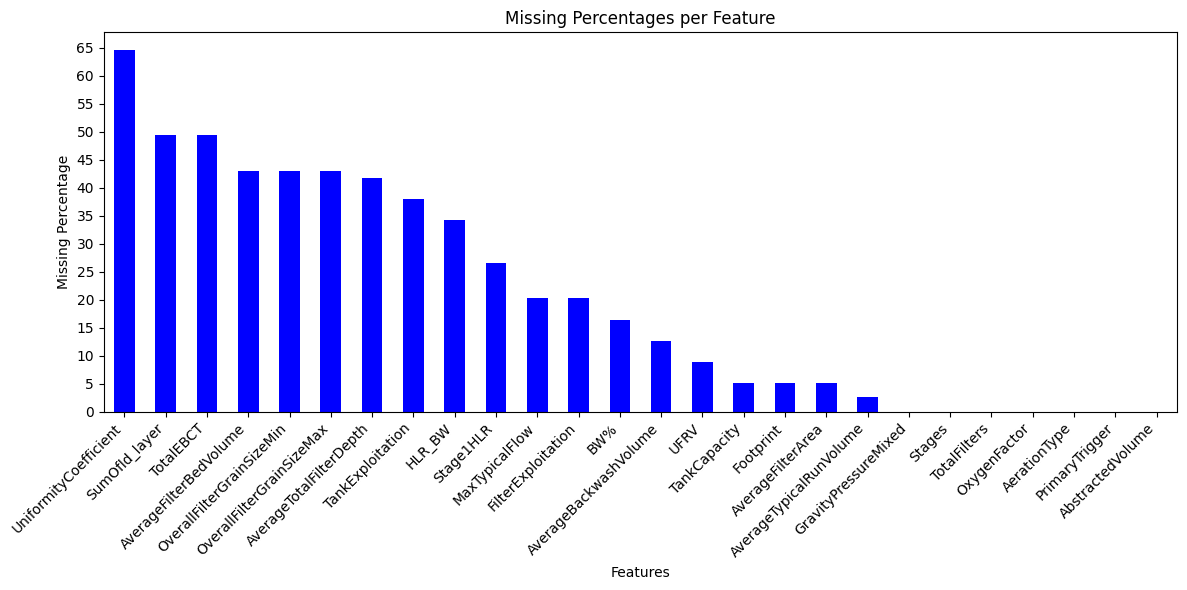

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


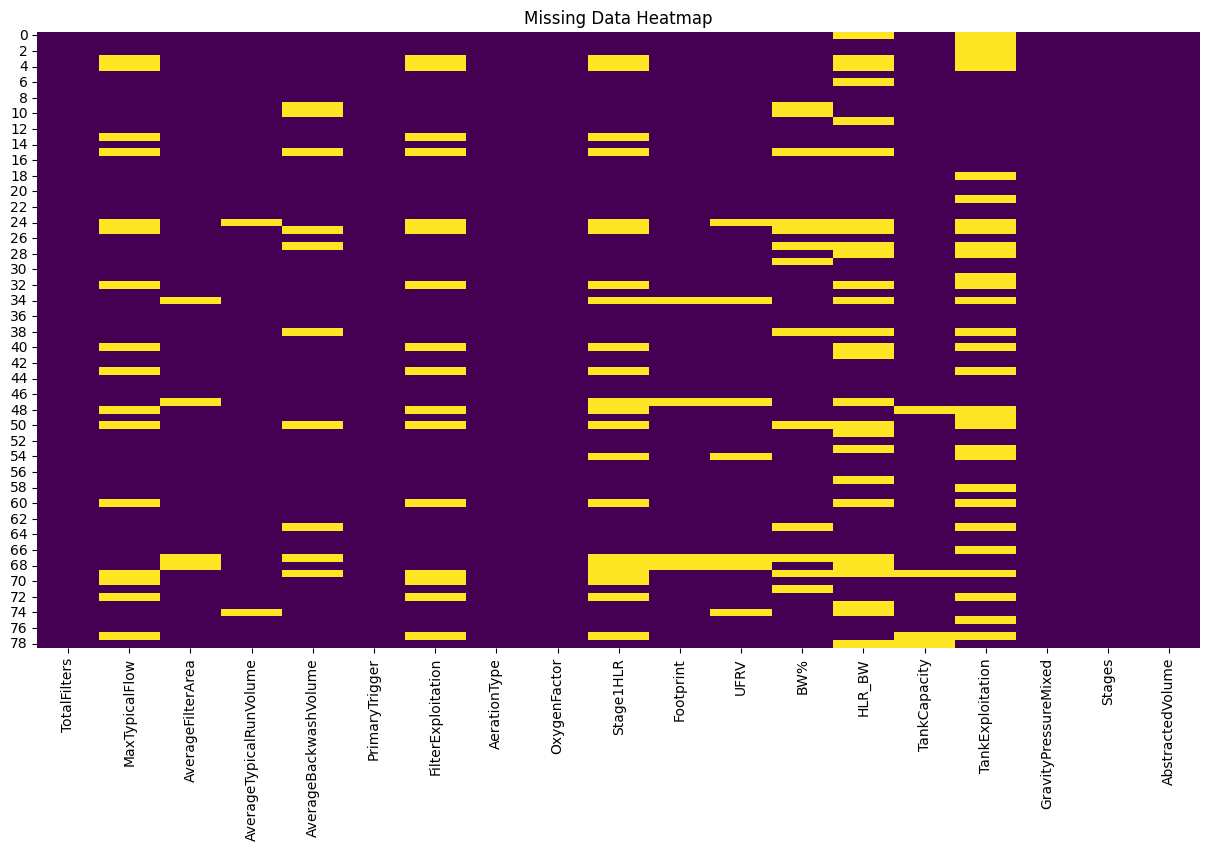

In [3]:
#remove irrelevant columns: WaterworksName
removedNamesDf = df.drop(columns=['WaterworksName'])

# Calculate the percentage of missing values per feature
missing_percentages_per_feature = removedNamesDf.isnull().mean().round(4) * 100

display(missing_percentages_per_feature)

# Create a bar graph for missing percentages per feature
plt.figure(figsize=(12, 6))
missing_percentages_per_feature.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Missing Percentages per Feature')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.yticks(range(0, 70, 5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop columns with more than 30% missing values
relevantColumnsDf = removedNamesDf.drop(columns=missing_percentages_per_feature[missing_percentages_per_feature > 40].index)
display(relevantColumnsDf)

# Show heatmap of missing values
plt.figure(figsize=(15, 8))
sns.heatmap(relevantColumnsDf.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

Next, we scale the data. The two boxplots below show the data being scaled using MinMaxScaler and StandardScaler. There is a difference between the boxplots - the MinMaxScaler is much cleaner to read and ranges from 0 to 1, therefore we don't have any negative values. The StandardScaler is more sensitive for outliers and assumes data is normally disitributed, which isn't the case in this instance.

Features ordered by skewness:
AverageTypicalRunVolume    5.079522
BW%                        4.425347
AbstractedVolume           4.395703
Footprint                  3.060684
MaxTypicalFlow             2.915702
TankCapacity               2.660706
AverageBackwashVolume      1.565571
AverageFilterArea          1.515693
UFRV                       1.484950
TankExploitation           1.361447
Stage1HLR                  1.288295
TotalFilters               1.265909
HLR_BW                     0.317641
FilterExploitation         0.058248
OxygenFactor              -0.763642
dtype: float64
+-------------------------+-------------------------+------------------+
| Name                    | Skewness                |   Skewness value |
+=========================+=========================+==================+
| TotalFilters            | Positively Skewed       |        1.26591   |
+-------------------------+-------------------------+------------------+
| MaxTypicalFlow          | Positively Skewed     

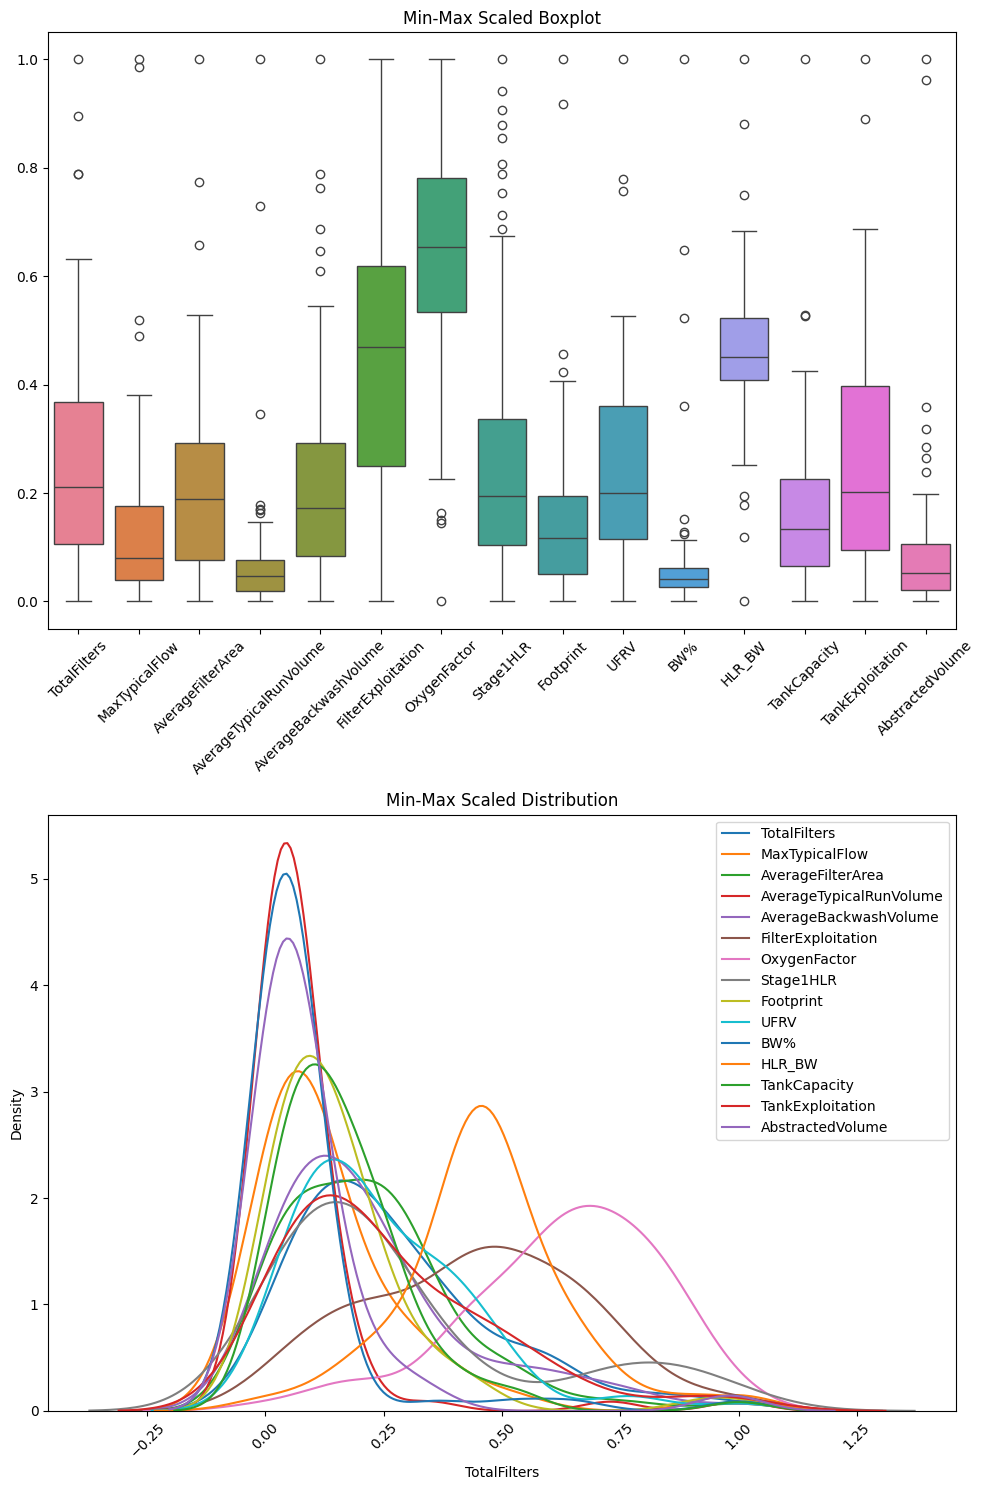

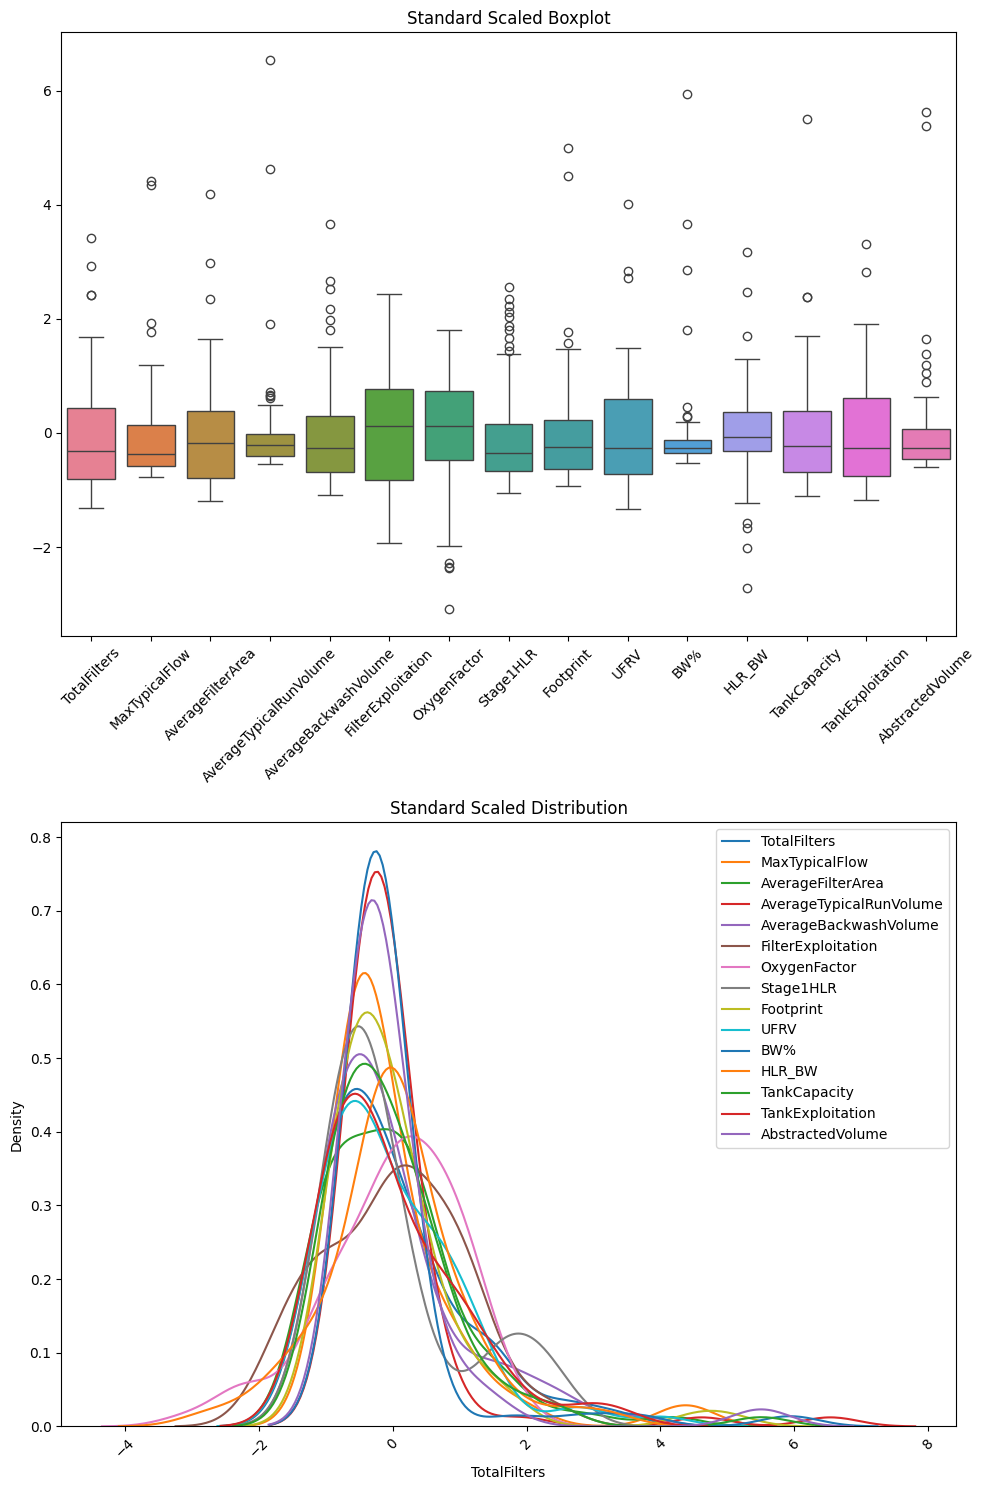

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from tabulate import tabulate


numeric_columns = relevantColumnsDf.select_dtypes(include=['number'])
scaler = MinMaxScaler()
s_scaler = StandardScaler()

# Transform data
min_max = scaler.fit_transform(numeric_columns)
standard = s_scaler.fit_transform(numeric_columns)

min_max_df = pd.DataFrame(min_max, columns=numeric_columns.columns)
standard_df = pd.DataFrame(standard, columns=numeric_columns.columns)

# Plotting boxplots
# Calculate skewness for each feature in the DataFrame
skewness = numeric_columns.apply(lambda x: x.skew())

# Order the features based on their skewness values
ordered_features = skewness.sort_values(ascending=False)

# Print the features in descending order of skewness
print("Features ordered by skewness:")
print(ordered_features)

# Categorize skewness
# Skewness values between -0.5 and 0.5 are considered approximately symmetric
# Skewness values less than -0.5 are considered negatively skewed
# Skewness values greater than 0.5 are considered positively skewed

# Categorize skewness
categorized_skewness = {}
for feature, skew in skewness.items():
    if skew < - 0.5:
        categorized_skewness[feature] = ('Negatively Skewed', skew)
    elif skew > 0.5:
        categorized_skewness[feature] = ('Positively Skewed', skew)
    else:
        categorized_skewness[feature] = ('Approximately Symmetric', skew)

# Convert categorized skewness to list of tuples for tabulate
skewness_table = [(feature, category, skew) for feature, (category, skew) in categorized_skewness.items()]

# Print as table
print(tabulate(skewness_table, headers=["Name", "Skewness", "Skewness value"], tablefmt="grid"))

# Plotting boxplots and distribution plots

# Min-Max Scaled Data
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
sns.boxplot(data=min_max_df)
plt.title('Min-Max Scaled Boxplot')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for column in min_max_df.columns:
    sns.kdeplot(min_max_df[column], label=column)
plt.title('Min-Max Scaled Distribution')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Standard Scaled Data
plt.figure(figsize=(10, 15))

plt.subplot(2, 1, 1)
sns.boxplot(data=standard_df)
plt.title('Standard Scaled Boxplot')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
for column in standard_df.columns:
    sns.kdeplot(standard_df[column], label=column)
plt.title('Standard Scaled Distribution')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Transformation of data. Add the boxplot and distribution plots to show changes after transformation. Transform based on the data skewness. 

 <!-- log transformation is suitable for strongly right-skewed data, sqrt transformation is suitable for slightly right-skewed data
 If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. -->
 <h4> We use log transformation for data with highly positive skewness and square root for data with the moderately positive skewness </h4>

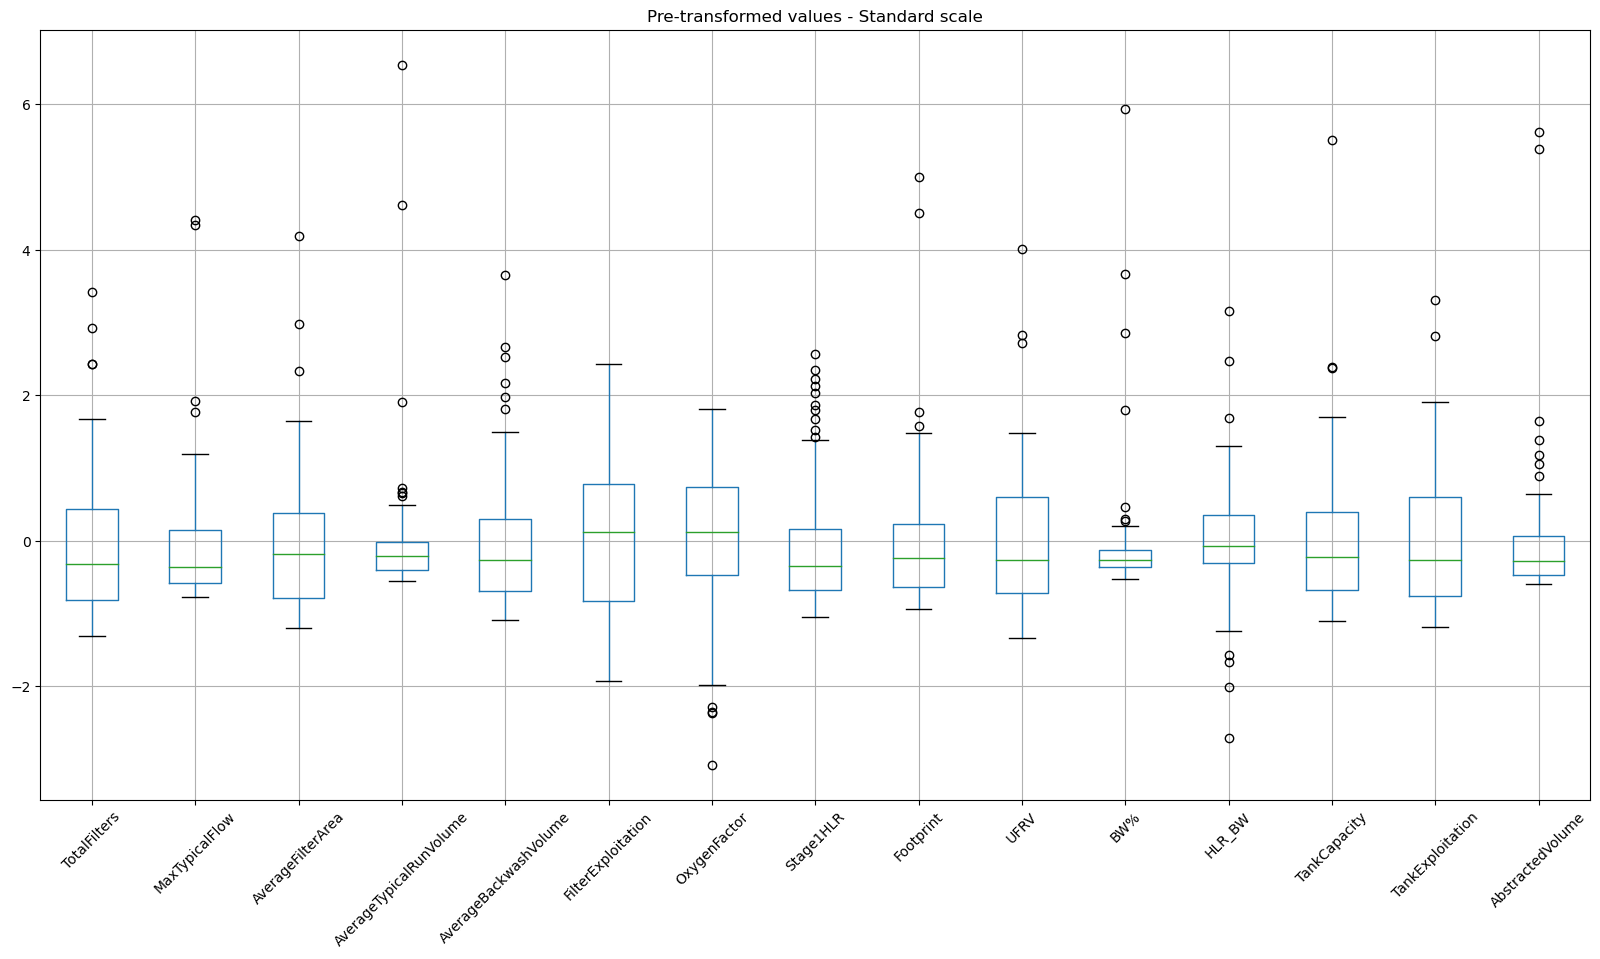

['TotalFilters', 'MaxTypicalFlow', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Stage1HLR', 'Footprint', 'UFRV', 'BW%', 'TankCapacity', 'TankExploitation', 'AbstractedVolume']
[]


c:\Users\sofia\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


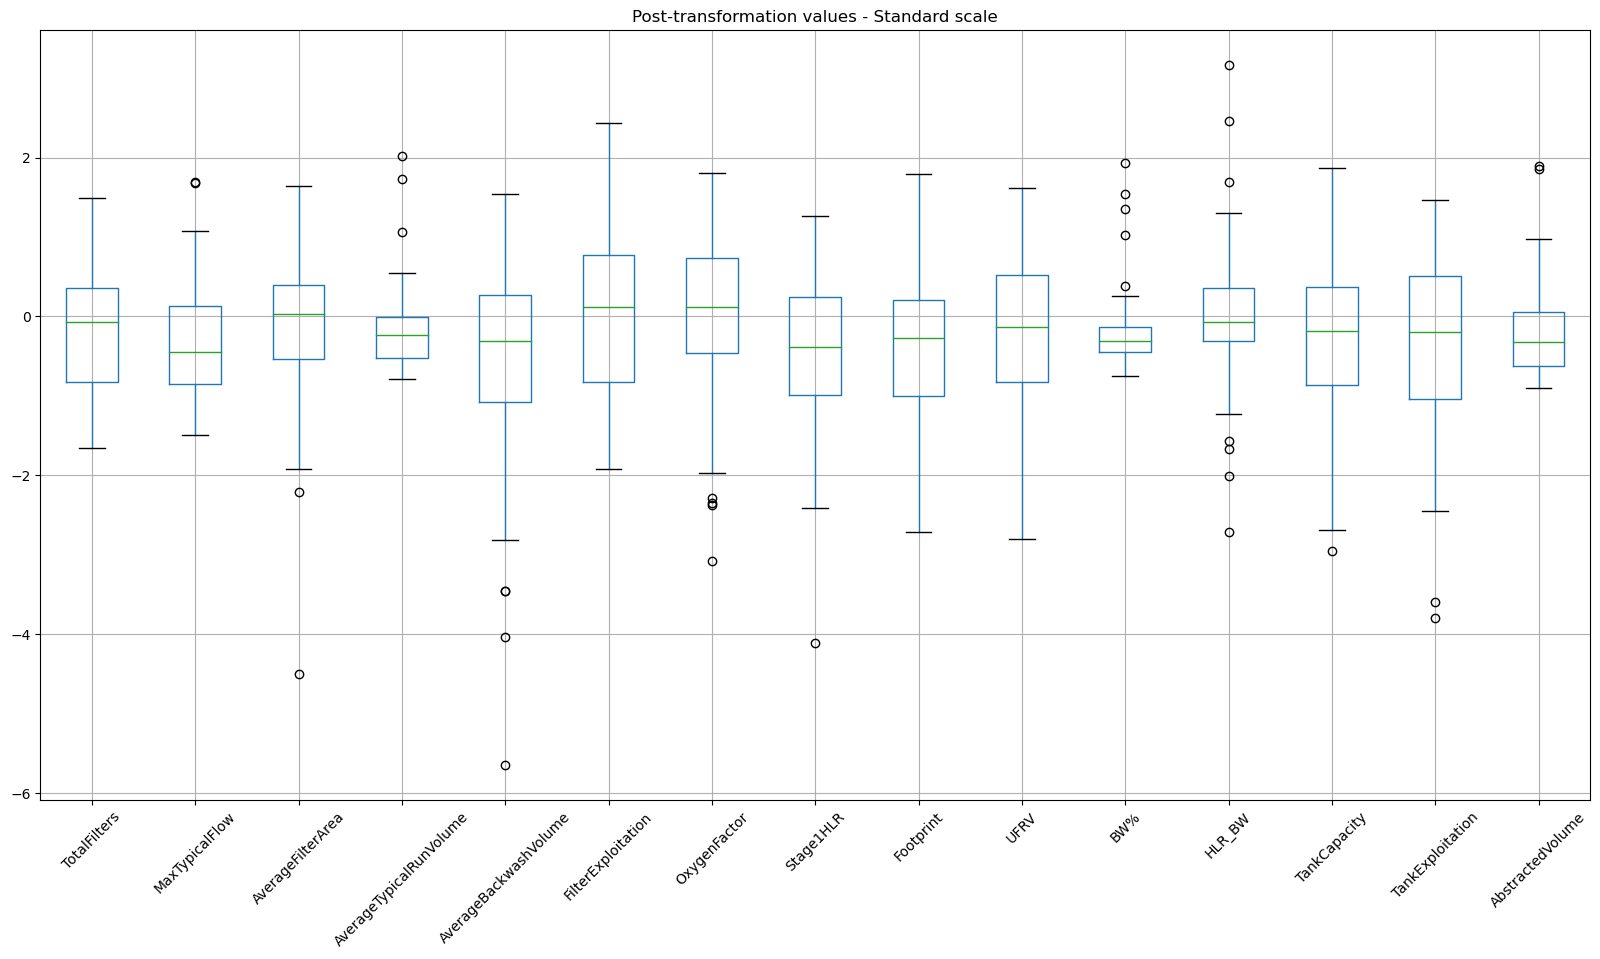

In [15]:
# transforming the skewed columns

#show original data shape boxplot
plt.figure(figsize=(20, 10))
standard_df.boxplot()
plt.xticks(rotation=45)
plt.title('Pre-transformed values - Standard scale')
plt.show()

# split positively skewed values into heavily and slightly skewed
heavilySkewed = []
slightlySkewed = []
categorized_skewness = {}
for feature, skew in skewness.items():
    if skew > 0.5 and skew < 1.0:
        slightlySkewed.append(feature)
    elif skew > 1.0:
        heavilySkewed.append(feature)

print(heavilySkewed)
print(slightlySkewed)

# strongly skewed
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), heavilySkewed)])
df_log = pd.DataFrame(logTr.fit_transform(standard_df), columns=heavilySkewed)

# slightly skewed
sqrtTr = ColumnTransformer(transformers=[("sqrt", FunctionTransformer(np.sqrt), slightlySkewed)])
df_sqrt = pd.DataFrame(sqrtTr.fit_transform(standard_df), columns=slightlySkewed)

transformed_df = pd.concat([df_log, df_sqrt], axis=1)
# plt.figure(figsize=(20, 10))
# transformed_df.boxplot()
# plt.xticks(rotation=45)
# plt.show()

standard_df[heavilySkewed] = df_log
standard_df[slightlySkewed] = df_sqrt

plt.figure(figsize=(20, 10))
standard_df.boxplot()
plt.xticks(rotation=45)
plt.title('Post-transformation values - Standard scale')
plt.show()

<!-- <h4>Then we check the data type of each column and impute each datatype with a specific function that works for given datatype. E.g. SimpleImputer with the most frequent value for the object data types (categorical data) and IterativeImputer for the numerical values (as this gives us better imputed values but is not posible to use for categorical data)</h4> -->

<h4>As can be seen in the heatmap above (PrimaryTrigger, AerationType, GravityPressureMixed, Stages) none of the categorical values are missing - so there is no need to impute them. We use IterativeImputer on the numerical data as the missing data might not be completely random (MAR).</h4>

In [9]:
# #print the columns data types
# print(f"Columns data types: \n{relevantColumnsDf.dtypes}")

# #impute missing values of the columns, use fillna method if the data type is object, and use IterativeImputer if the data type is float64 or int64
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

number_df = relevantColumnsDf.select_dtypes(include=['number'])

#impute missing values of the float64 and int64 data type columns
imputer = IterativeImputer(max_iter=10, random_state=0)
number_df = pd.DataFrame(imputer.fit_transform(number_df), columns=number_df.columns)
display(number_df)


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,AbstractedVolume
0,6.0,50.000000,6.000000,5200.00000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,0.414525,29.622063,27.294778,24.138416,253543.0
1,4.0,110.000000,4.908739,300.00000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,25.468505,612094.0
2,4.0,120.000000,15.343900,3800.00000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,24.683571,682318.0
3,2.0,109.739272,16.000000,1200.00000,26.00,52.738296,2.073333,-2.260294,194.588021,75.000000,2.166907,29.285231,12.554300,25.031884,156998.0
4,2.0,95.289790,1.495000,250.00000,4.50,39.008961,1.313333,-14.287283,412.300024,167.224093,1.818182,28.976482,52.220566,25.181398,6710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16.0,1426.000000,47.940002,15468.38692,110.00,91.698648,1.546667,5.242647,24.106636,298.070413,0.178441,52.924927,9.176959,39.682540,11454775.0
75,20.0,1407.290000,10.178760,4500.00000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,29.806012,11021800.0
76,6.0,250.000000,14.752500,2331.50137,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,423362.0
77,12.0,317.459459,37.437401,4400.00000,134.00,62.773357,2.200000,-0.950504,152.513970,93.489396,35.386015,32.053507,17.217232,24.981173,1521895.0


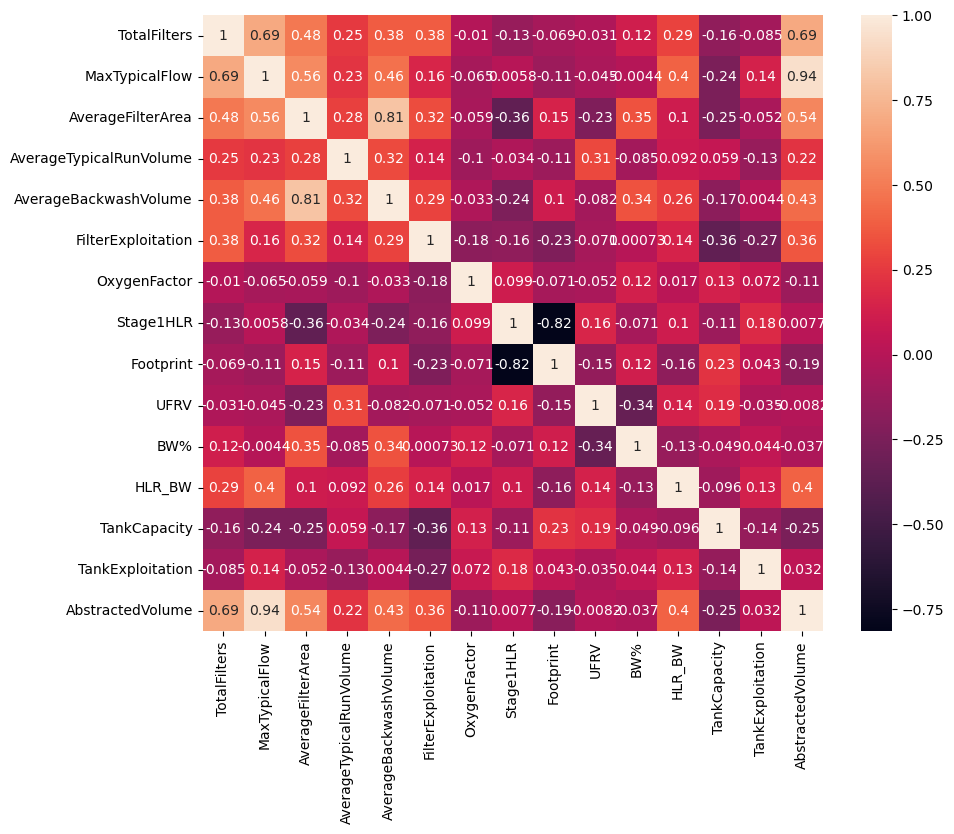

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = number_df.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.show()

# we could remove the columns that are highly correlated (1 or -1)
# maxtypicalflow -> abstracted volume
# df_imputed = df_imputed.drop(columns = ['MaxTypicalFlow'])
# display(df_imputed)

We create the correlation matrix with a dataframe containing only numerical data that has been imputed using IterativeImputer. The highest positive correlation can be seen in these cases: MaxTypicalFlow and AbstractVolume (0.94), AverageBackwashVolume and AverageFilterArea (0.81), TotalFilters and AbstractedVolume, TotalFilters and MaxTypicalFlow (0.69). the highest negative correlation - Footprint and Stage1HLR (-0.82). We set the remove-threshold to 0.9 so one of the MaxTypicalFlow and AbstractVolume can be removed. We don't remove the negative correlation.

<p>As we can see in the correlation matrix above, the calumns with the highest correlation are:</p>
<ul>
<li>0.94 - AbstractedVolume : MaxTypicalFlow</li>
<li>0.81 - AverageBackwashVolume : AverageFilterArea</li>
<li>0.69 - TotalFilters : AbstractedVolume</li>
<li>0.68 - TotalFilters : MaxTypicalFlow</li>

</ul>

<h4>Same as in the previous step we now display the correlation matrix in order to see the different correlations between each of the columns - also without the categorical data as all of them seemed highly unrelevant (mostly high negative correlation, maybe it would make sense to use the Chi-Square (as this works well for checking correlation between categorical data))</h4>



<p>Also check for duplicates:</p>

In [ ]:
columnsToDrop = ['MaxTypicalFlow']
cleanDf = number_df.drop(columns=columnsToDrop)

duplicate_rows = cleanDf[cleanDf.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

Number of duplicate rows:  0


,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,TotalFilters,AbstractedVolume
0,0.078884,0.054519,0.437724,0.610390,0.552230,0.306610,0.758179,0.082107,0.496835,0.263365,0.264832,0.263158,0.021561
1,0.000797,0.161185,0.490966,0.399351,0.853979,0.018993,0.000000,0.674907,0.445406,0.000000,0.278175,0.157895,0.052881
2,0.056574,0.488889,0.504070,0.880952,0.630503,0.082545,0.191375,0.128763,0.478478,0.205094,0.268730,0.157895,0.059015
3,0.015139,0.149333,0.339471,0.767316,0.446001,0.423011,0.031447,0.128102,0.412121,0.106313,0.275681,0.052632,0.013128
4,0.000000,0.021926,0.000000,0.150433,0.120507,0.917517,0.116106,0.118949,0.362960,0.528936,0.277227,0.052632,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.219054,0.647111,0.757195,0.339827,0.670701,0.035784,0.299031,0.075911,0.632959,0.070329,0.445497,0.789474,1.000000
75,0.067729,0.333037,0.735530,0.816017,0.722047,0.031114,0.368434,0.103690,0.749303,0.036911,0.270854,1.000000,0.962179
76,0.033171,0.300859,0.073441,0.442641,0.596360,0.455919,0.107676,0.187923,0.442593,0.210868,0.519111,0.263158,0.036395
77,0.066135,0.789333,0.554793,0.870130,0.463778,0.327445,0.048419,1.000000,0.467548,0.113559,0.268137,0.578947,0.132353


In [13]:
columnsToDrop = ['MaxTypicalFlow']
cleanDf = number_df.drop(columns=columnsToDrop)

duplicate_rows = cleanDf[cleanDf.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])
cleanDf

Number of duplicate rows:  0


,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,AbstractedVolume
0,6.0,6.000000,5200.00000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,0.414525,29.622063,27.294778,24.138416,253543.0
1,4.0,4.908739,300.00000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,25.468505,612094.0
2,4.0,15.343900,3800.00000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,24.683571,682318.0
3,2.0,16.000000,1200.00000,26.00,52.738296,2.073333,-2.260294,194.588021,75.000000,2.166907,29.285231,12.554300,25.031884,156998.0
4,2.0,1.495000,250.00000,4.50,39.008961,1.313333,-14.287283,412.300024,167.224093,1.818182,28.976482,52.220566,25.181398,6710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16.0,47.940002,15468.38692,110.00,91.698648,1.546667,5.242647,24.106636,298.070413,0.178441,52.924927,9.176959,39.682540,11454775.0
75,20.0,10.178760,4500.00000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,29.806012,11021800.0
76,6.0,14.752500,2331.50137,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,423362.0
77,12.0,37.437401,4400.00000,134.00,62.773357,2.200000,-0.950504,152.513970,93.489396,35.386015,32.053507,17.217232,24.981173,1521895.0


<hr>

<p>Since we have 80 rows in our dataset we should probably check if there are any near-duplicates instances and if yes remove them, so that we don't end up with similar/duplicate instances in both train and test sets, as this would have a bad influence on the model's performance.</p>

Describe the encoding and combine the final data frame with scaled, transformed and encoded data.

In [ ]:
# #print the columns data types
# print(f"Columns data types: \n{relevantColumnsDf.dtypes}")


df = pd.concat([df.drop(columns=numeric_columns.columns), df_imputed], axis=1)

df_encoded = pd.get_dummies(df, columns=['PrimaryTrigger', 'GravityPressureMixed', 'AerationType'])
label_encoder = LabelEncoder()

# we will use label encoding for the stages and aeration type as they have hight cardinality (many unique values)
df_encoded['Stages_encoded'] = label_encoder.fit_transform(df_encoded['Stages'])

df_encoded = df_encoded.drop(columns=['Stages'])
display(df_encoded)